In [1]:
#Importing
import numpy as np
import random
import time
import warnings
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# Suppress runtime warnings that can occur in benchmark functions
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def f1(x, d):
    f = 0
    for i in range(d):
        f += x[i] ** 2
    return f

def f2(x,d):
    s = 0
    p = 1
    for i in range(d):
        s += abs(x[i])
    for i in range(d):
        p *= abs(x[i])
    f = s + p
    return f

def f3(x,d):
    f = 0
    for i in range(1,d+1):
        s = 0
        for j in range(i):
            s += x[j]
        f += s**2
    return f

def f4(x,d):
    f = float("-inf")
    for i in range(d):
        if abs(x[i]) > f:
            f = abs(x[i])
    return f

def f5(x,d):
    f = 0
    for i in range(d-1):
        f += 100*((x[i+1] - x[i]**2)**2) + (x[i] - 1)**2
    return f

def f6(x,d):
    f = 0
    for i in range(d):
        f += abs(x[i] + 0.5) ** 2
    return f

def f7(x,d):
    f = 0
    for i in range(d):
        f += (i+1.0) * (x[i] ** 4.0)
    return f + np.random.uniform(0,1)

def f8(x,d):
    f = 0
    for i in range(d):
        f += -(x[i] * math.sin(math.sqrt(abs(x[i]))))
    return f

def f9(x,d):
    f = 0
    p = math.pi
    for i in range(d):
        f += ((x[i]**2) - (10 * math.cos(2*p*x[i])) + 10)
    return f

def f10(x,d):
    p = math.pi
    s = 0
    n = 0
    for i in range(d):
        s += x[i]**2
    for i in range(d):
        n += math.cos(2*p*x[i])
    f = (-20 * np.exp(-0.2 * math.sqrt((1/d) * s))) - np.exp((1/d) * n) + 20 + np.e
    return f

def f11(x, d):
    p=1
    s = 0
    for i in range(d):
        p = p * math.cos(x[i]/math.sqrt(i+1))
        s += x[i]**2
    f =  (s/4000) - p + 1.0
    return f

def f12(n,d):
    def u(s,a,k,m):
        if s > a:
            return (k*((s-a)**m))
        elif s < -a:
            return (k*((-s-a)**m))
        else:
            return 0
    def y(s):
        return (1 + 0.25*(s+1))
    a = 10
    k = 100
    m = 4
    ui = 0
    xi = 0
    p = math.pi
    for i in range(d):
        ui += u(n[i],a,k,m)
    for i in range(d-1):
        xi += ((y(n[i])-1)**2) * (1 + 10*(math.sin(p*y(n[i+1]))**2))
    f = (p/(d+1)) * ( 10*(math.sin(p*y(n[0]))**2) + xi + (y(n[-1]) - 1)**2) + ui
    return f



def f13(n,d):
    def u(s,a,k,m):
        if s > a:
            return (k*((s-a)**m))
        elif s < -a:
            return (k*((-s-a)**m))
        else:
            return 0
    a = 5
    k = 100
    m = 4
    ui = 0
    xi = 0
    p = math.pi
    for i in range(d):
        ui += u(n[i],a,k,m)
    for i in range(d-1):
        xi += ((n[i]-1)**2) * (1 + math.sin(3*p*n[i+1])**2)
    f = 0.1 * ( (math.sin(3*p*n[0])**2) + xi + (((n[-1] - 1)**2) * (1 + math.sin(2*p*n[-1])**2)) ) + ui
    return f

def f14(x, d):
    f = 0
    a = [[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],
         [-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]]
    for j in range(1,26):
        s = 0
        for i in range(1,3):
            s += ((x[i-1]-a[i-1][j-1])**6)
        f += 1/(j+s)
    f = (1/((1/500) + f))
    return f

# Kowalik
def f15(m,d):
    aK=[.1957,.1947,.1735,.16,.0844,.0627,.0456,.0342,.0323,.0235,.0246]
    bK=[.25,.5,1,2,4,6,8,10,12,14,16]
    aK=np.asarray(aK)
    bK=np.asarray(bK)
    bK = 1/bK
    fit=np.sum((aK-((m[0]*(bK**2+m[1]*bK))/(bK**2+m[2]*bK+m[3])))**2)
    return fit

# Six Hump Camel function
def f16(x, d):
    f = ((4 - 2.1*(x[0]**2) + (x[0]**4)/3)*(x[0]**2)) + x[0]*x[1] + ((-4 + 4*(x[1]**2))*(x[1]**2))
    return f
# range = [-5, 5], d=2, value = −1.0316, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


def f17(x, d):
    p = math.pi
    f = ((x[1] - (5.1/(4*(p**2)))*(x[0]**2) + ((5/p)*x[0]) - 6)**2) + (10*(1-(1/(8*p)))*math.cos(x[0])) + 10
    return f
# range = [-5,5], d = 2, value = 0.398


# Goldstein Price Function
def f18(x, d):
    s = 30 + (((2*x[0]) - (3*x[1]))**2) * (18-(32*x[0]) + (12*(x[0]**2)) + (48*x[1]) - (36*x[0]*x[1]) + (27*(x[1]**2)))
    first = (1 + ((x[0]+x[1]+1)**2) * (19-(14*x[0])+(3*(x[0]**2))-(14*x[1])+(6*x[0]*x[1])+ (3*(x[1]**2))))
    f = first * s
    return f
# range = [-2,2], d = 2, value = 3


# hartmann function 3
def f19(x, d):
    A = np.array([[ 3. , 10. , 30. ], [ 0.1, 10. , 35. ], [ 3. , 10. , 30. ], [ 0.1, 10. , 35. ]])
    P = np.array([[ 0.3689, 0.117 , 0.2673], [ 0.4699, 0.4387, 0.7470 ], [ 0.1091 , 0.8732, 0.5547], [ 0.0381, 0.5743, 0.8828]])
    alpha = np.array([1.0, 1.2, 3.0, 3.2])
    f = 0
    for i in range(4):
        s = 0
        for j in range(3):
            s += (A[i][j] * (x[j] - P[i][j])**2)
        f += (alpha[i] * np.exp(-s))
    return -f
# range = [0,1], d=3, value = -3.86278, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


# hartmann function 6
def f20(x, d):
    A = np.array([[10, 3, 17, 3.50, 1.7, 8],
                [0.05, 10, 17, 0.1, 8, 14],
                [3, 3.5, 1.7, 10, 17, 8],
                [17, 8, 0.05, 10, 0.1, 14]])
    P = np.array([[0.1312, 0.1696, 0.5569, 0.0124, 0.8283, 0.5886],
                [0.2329, 0.4135, 0.8307, 0.3736, 0.1004, 0.9991],
                [0.2348, 0.1451, 0.3522, 0.2883, 0.3047, 0.6650],
                [0.4047, 0.8828, 0.8732, 0.5743, 0.1091, 0.0381]])
    alpha = np.array([1.0, 1.2, 3.0, 3.2])
    alpha = alpha.transpose()
    f = 0
    for i in range(4):
        s = 0
        for j in range(6):
            s += (A[i][j] * ((x[j] - P[i][j])**2))
        f += (alpha[i] * np.exp(-s))
    return -f
# range = [0,1], d=6, value = -3.32278, n= 100, iter = 5000, p=20, I=C= 0.1, y1=y2=1


# shekel 5
def f21(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7]]
    c = [0.1,0.2,0.2,0.4,0.4]
    f = 0
    s = 0
    for i in range(5):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.1532


# shekel 7
def f22(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3]]
    c = [0.1,0.2,0.2,0.4,0.4,0.6,0.3]
    f = 0
    s = 0
    for i in range(7):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.4028

# shekel 10
def f23(x,d):
    a = [[4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3],
        [8,1,8,1],
        [6,2,6,2],
        [7,3.6,7,3.6]]
    c = [0.1,0.2,0.2,0.4,0.4,0.6,0.3,0.7,0.5,0.5]
    f = 0
    s = 0
    for i in range(10):
        for j in range(d):
            s += ((x[j] - a[i][j])**2)
        f += (1/(s + c[i]))
    return -f
#range = [0,10], d = 4, value = -10.5363

In [10]:
def WaOA(func, lb, ub, dim, N, T):
    if not isinstance(lb, np.ndarray):
        lb = np.full(dim, lb)
    if not isinstance(ub, np.ndarray):
        ub = np.full(dim, ub)

    walrus_positions = np.random.uniform(0, 1, (N, dim)) * (ub - lb) + lb
    walrus_fitness = np.array([func(pos) for pos in walrus_positions])

    best_walrus_pos = walrus_positions[np.argmin(walrus_fitness)]
    best_walrus_fitness = np.min(walrus_fitness)

    convergence_curve = np.zeros(T)

    for t in range(1, T + 1):
        for i in range(N):
            current_pos = walrus_positions[i].copy()
            current_fitness = walrus_fitness[i]

            # Phase 1
            rand = np.random.rand(dim)
            I = np.random.randint(1, 3, dim)
            new_pos_p1 = current_pos + rand * (best_walrus_pos - I * current_pos)
            new_pos_p1 = np.clip(new_pos_p1, lb, ub)
            new_fitness_p1 = func(new_pos_p1)

            if new_fitness_p1 < current_fitness:
                current_pos = new_pos_p1
                current_fitness = new_fitness_p1

            # Phase 2
            k = np.random.choice(np.delete(np.arange(N), i))
            rand = np.random.rand(dim)
            I = np.random.randint(1, 3, dim)

            if walrus_fitness[k] < current_fitness:
                new_pos_p2 = current_pos + rand * (walrus_positions[k] - I * current_pos)
            else:
                new_pos_p2 = current_pos + rand * (current_pos - walrus_positions[k])

            new_pos_p2 = np.clip(new_pos_p2, lb, ub)
            new_fitness_p2 = func(new_pos_p2)

            if new_fitness_p2 < current_fitness:
                current_pos = new_pos_p2
                current_fitness = new_fitness_p2

            # Phase 3 (CORRECTED)
            lb_local = lb / t
            ub_local = ub / t

            # This creates an unbiased random step within the shrinking neighborhood
            rand_vec = np.random.rand(dim)
            step = lb_local + rand_vec * (ub_local - lb_local)
            new_pos_p3 = current_pos + step

            new_pos_p3 = np.clip(new_pos_p3, lb, ub)
            new_fitness_p3 = func(new_pos_p3)

            if new_fitness_p3 < current_fitness:
                current_pos = new_pos_p3
                current_fitness = new_fitness_p3

            walrus_positions[i] = current_pos
            walrus_fitness[i] = current_fitness

        current_best_fitness = np.min(walrus_fitness)
        if current_best_fitness < best_walrus_fitness:
            best_walrus_fitness = current_best_fitness
            best_walrus_pos = walrus_positions[np.argmin(walrus_fitness)]

        convergence_curve[t-1] = best_walrus_fitness

    return best_walrus_fitness, convergence_curve

Running Implementation of WaOA with new benchmark functions
Parameters: Pop Size=30, Max Iterations=500, Runs=30

--- Testing Function: f1 ---


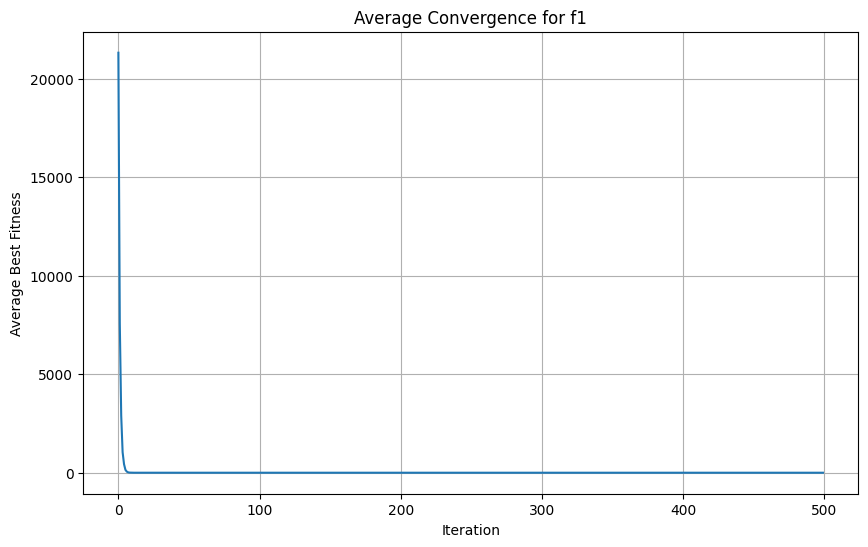


-------------------------
Results for f1:
  AVRG : 3.237162e-220
  STD :  0.000000e+00
  Time Taken:   38.88 seconds
  Convergence graph saved as f1_convergence.png
-------------------------

--- Testing Function: f2 ---


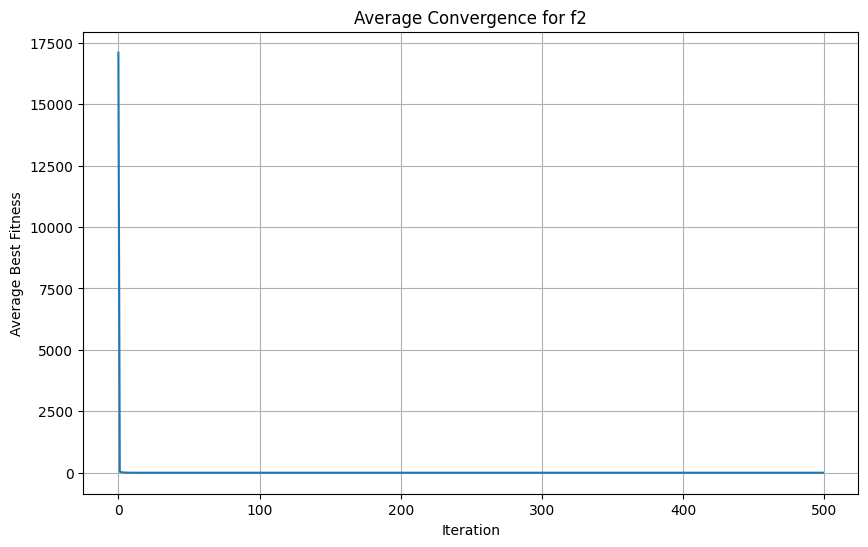


-------------------------
Results for f2:
  AVRG : 2.329058e-113
  STD :  5.723796e-113
  Time Taken:   43.48 seconds
  Convergence graph saved as f2_convergence.png
-------------------------

--- Testing Function: f3 ---


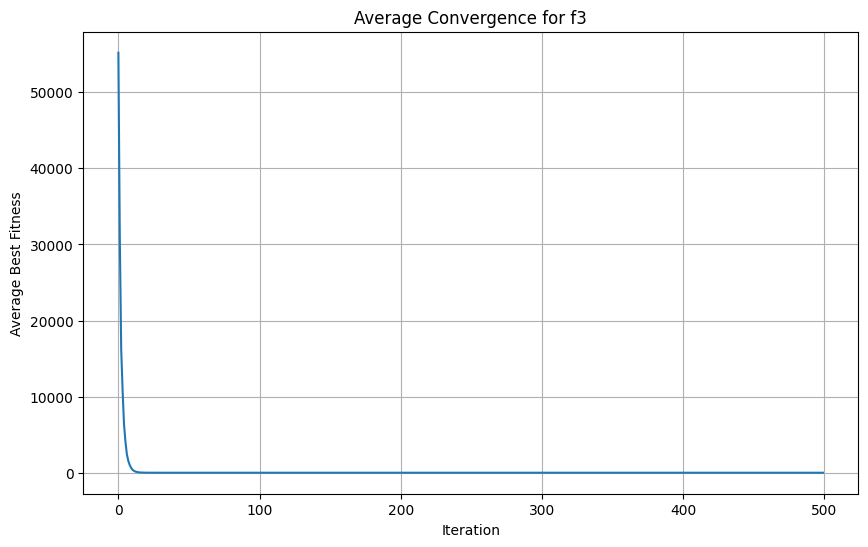


-------------------------
Results for f3:
  AVRG : 5.461450e-106
  STD :  2.894868e-105
  Time Taken:   119.21 seconds
  Convergence graph saved as f3_convergence.png
-------------------------

--- Testing Function: f4 ---


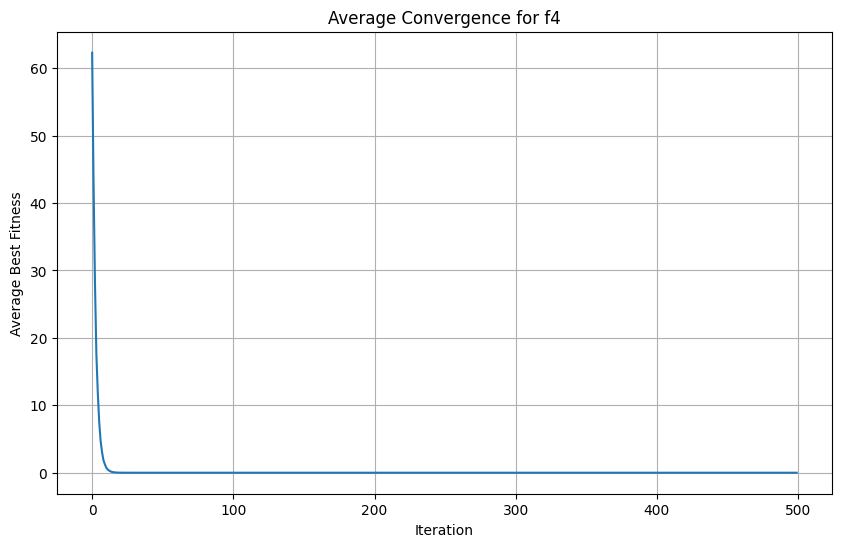


-------------------------
Results for f4:
  AVRG : 5.441066e-100
  STD :  4.697904e-100
  Time Taken:   35.75 seconds
  Convergence graph saved as f4_convergence.png
-------------------------

--- Testing Function: f5 ---


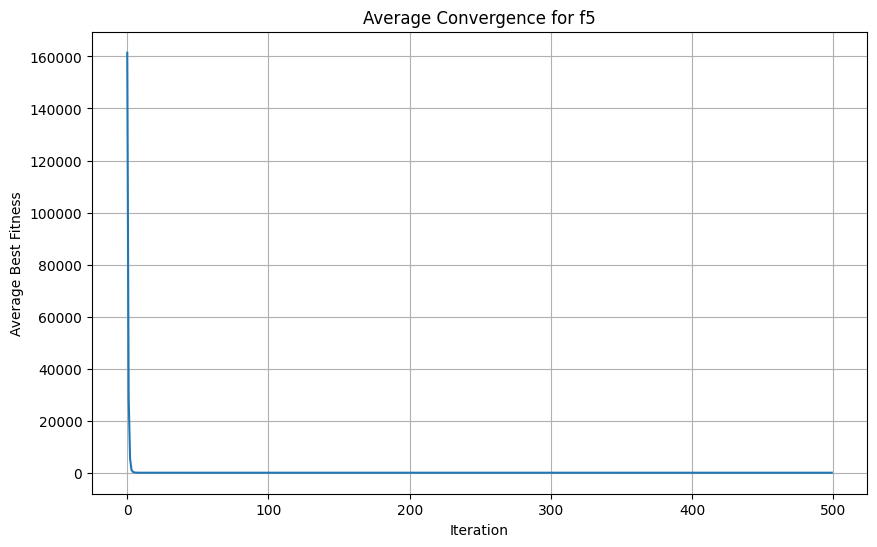


-------------------------
Results for f5:
  AVRG : 2.539357e+01
  STD :  9.710224e-01
  Time Taken:   61.36 seconds
  Convergence graph saved as f5_convergence.png
-------------------------

--- Testing Function: f6 ---


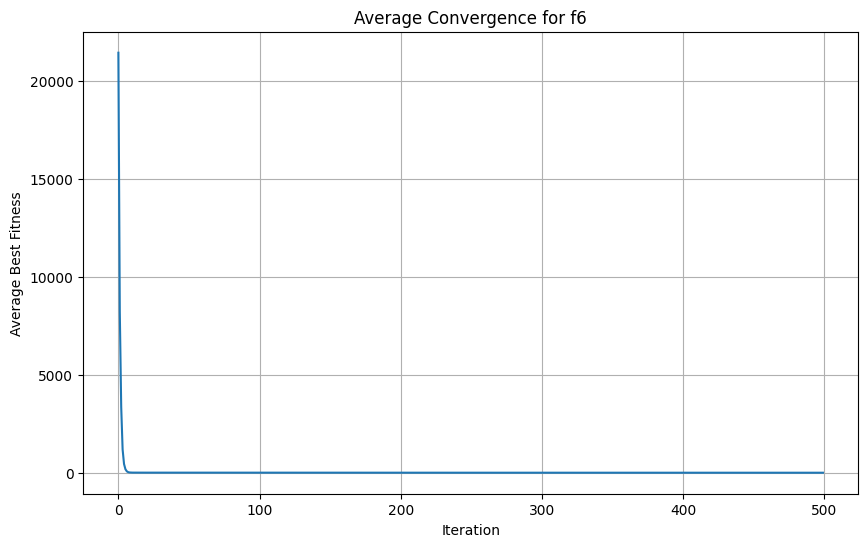


-------------------------
Results for f6:
  AVRG : 5.147191e-01
  STD :  6.657308e-02
  Time Taken:   43.32 seconds
  Convergence graph saved as f6_convergence.png
-------------------------

--- Testing Function: f7 ---


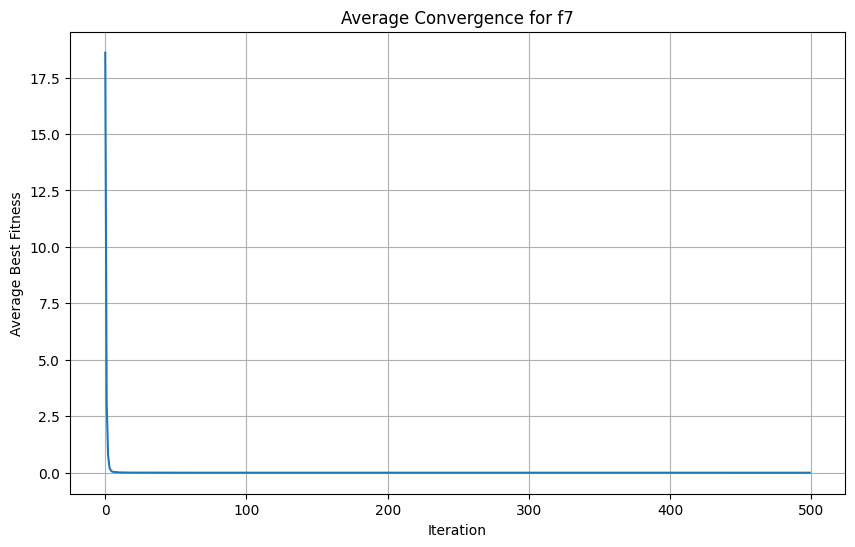


-------------------------
Results for f7:
  AVRG : 1.413865e-04
  STD :  6.852586e-05
  Time Taken:   47.50 seconds
  Convergence graph saved as f7_convergence.png
-------------------------

--- Testing Function: f8 ---


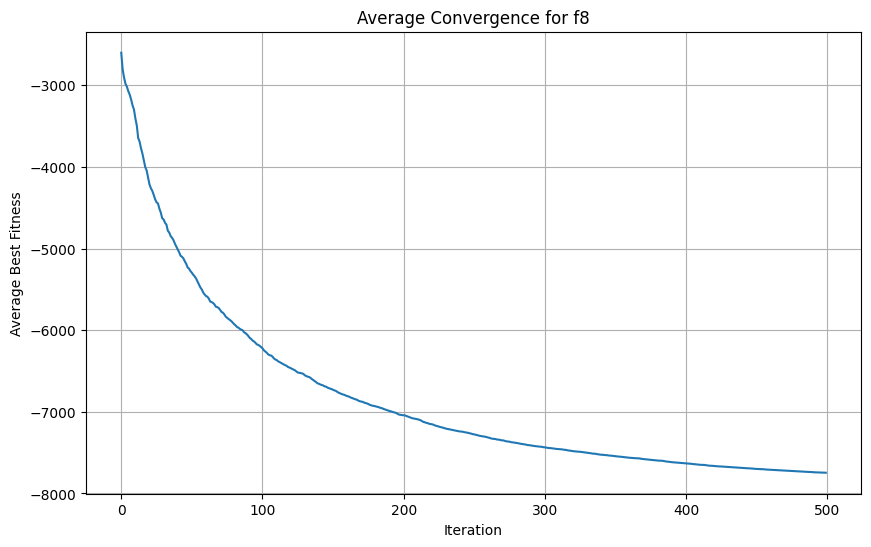


-------------------------
Results for f8:
  AVRG : -7.746577e+03
  STD :  6.565047e+02
  Time Taken:   46.70 seconds
  Convergence graph saved as f8_convergence.png
-------------------------

--- Testing Function: f9 ---


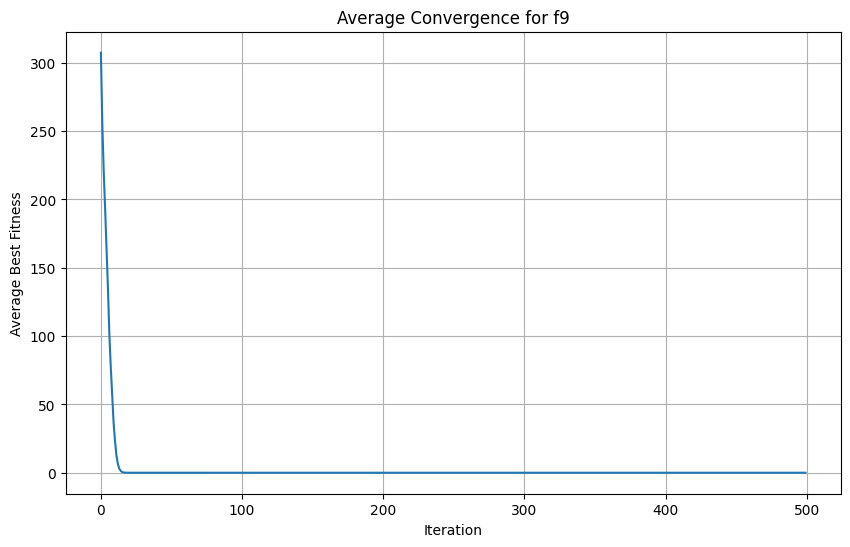


-------------------------
Results for f9:
  AVRG : 0.000000e+00
  STD :  0.000000e+00
  Time Taken:   52.56 seconds
  Convergence graph saved as f9_convergence.png
-------------------------

--- Testing Function: f10 ---


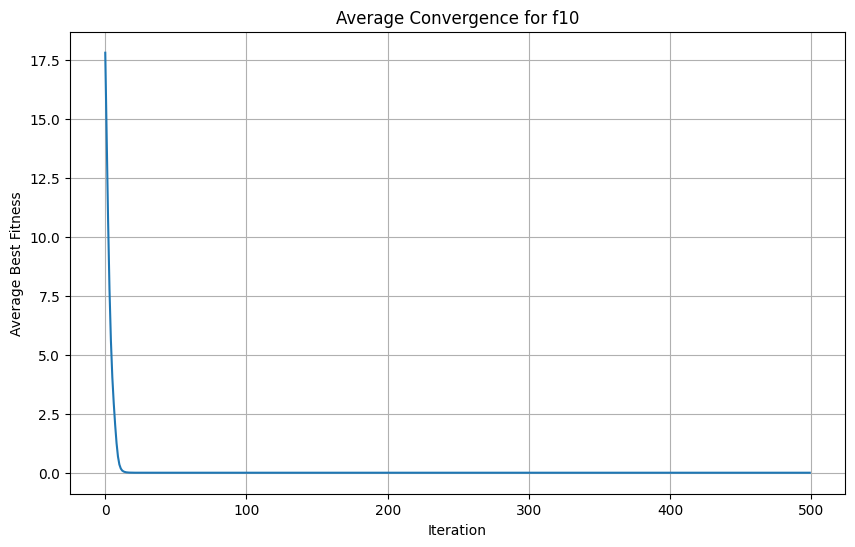


-------------------------
Results for f10:
  AVRG : 3.996803e-15
  STD :  0.000000e+00
  Time Taken:   52.20 seconds
  Convergence graph saved as f10_convergence.png
-------------------------

--- Testing Function: f11 ---


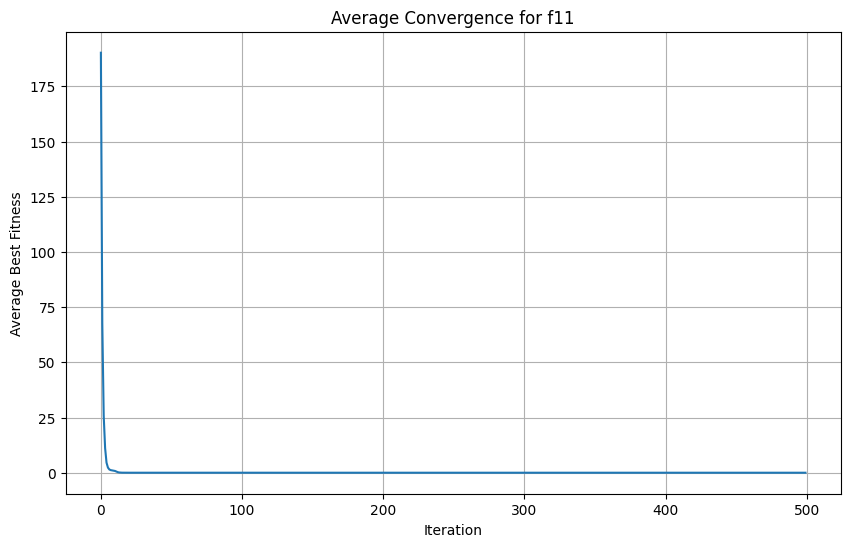


-------------------------
Results for f11:
  AVRG : 0.000000e+00
  STD :  0.000000e+00
  Time Taken:   49.25 seconds
  Convergence graph saved as f11_convergence.png
-------------------------

--- Testing Function: f12 ---


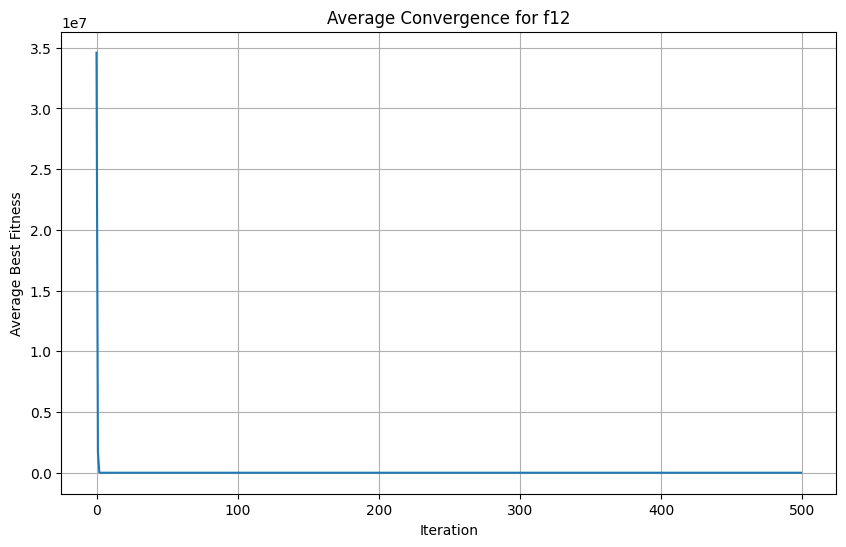


-------------------------
Results for f12:
  AVRG : 4.002290e-03
  STD :  5.512724e-04
  Time Taken:   87.32 seconds
  Convergence graph saved as f12_convergence.png
-------------------------

--- Testing Function: f13 ---


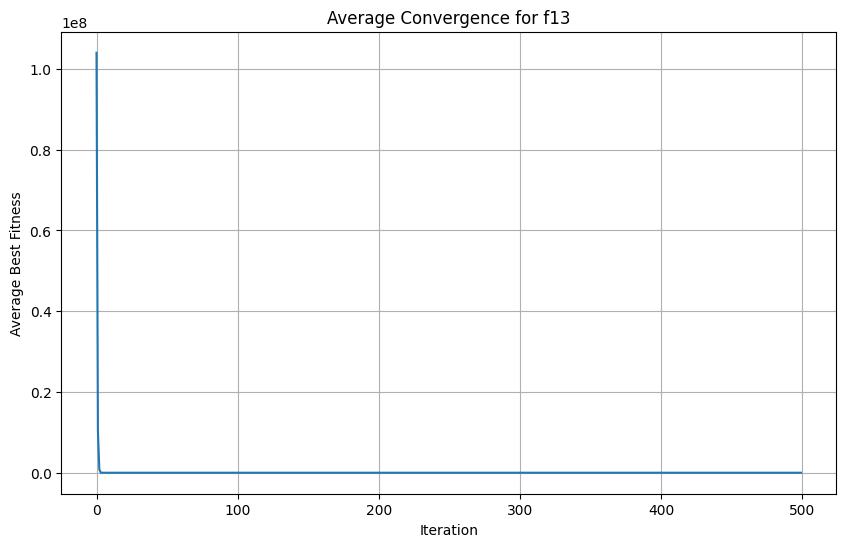


-------------------------
Results for f13:
  AVRG : 8.788858e-02
  STD :  1.482077e-02
  Time Taken:   68.20 seconds
  Convergence graph saved as f13_convergence.png
-------------------------

--- Testing Function: f14 ---


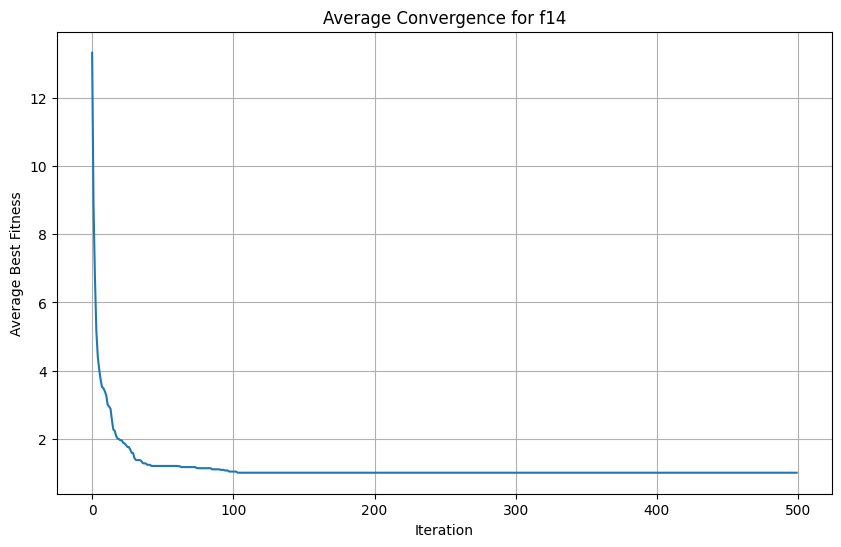


-------------------------
Results for f14:
  AVRG : 9.980038e-01
  STD :  5.733167e-17
  Time Taken:   63.39 seconds
  Convergence graph saved as f14_convergence.png
-------------------------

--- Testing Function: f15 ---


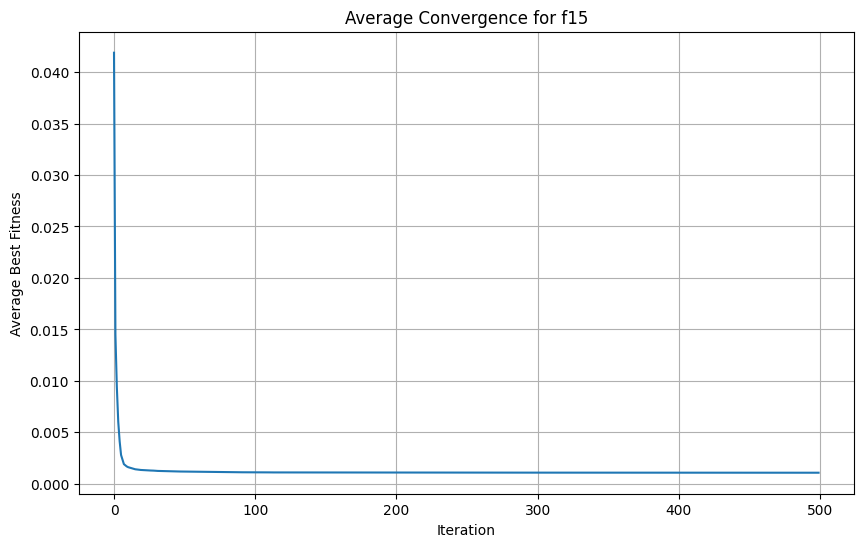


-------------------------
Results for f15:
  AVRG : 1.073367e-03
  STD :  3.591761e-03
  Time Taken:   52.87 seconds
  Convergence graph saved as f15_convergence.png
-------------------------

--- Testing Function: f16 ---


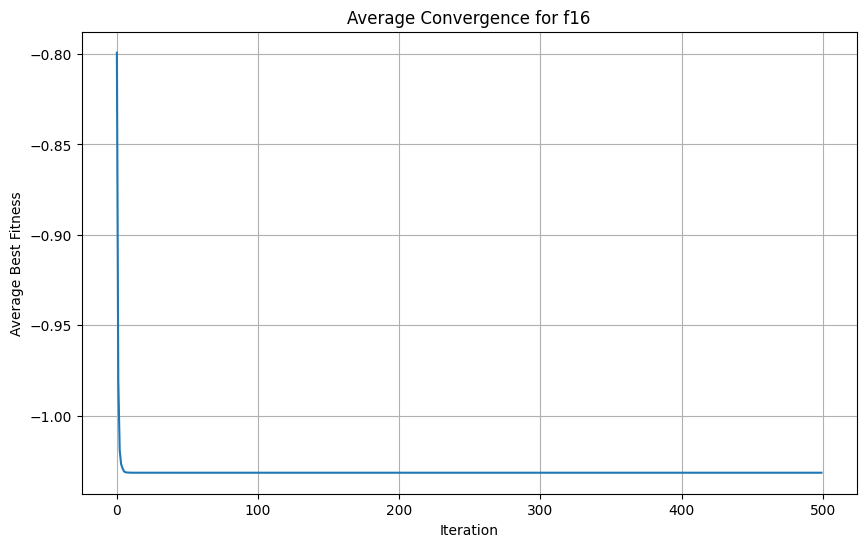


-------------------------
Results for f16:
  AVRG : -1.031628e+00
  STD :  2.220446e-16
  Time Taken:   30.92 seconds
  Convergence graph saved as f16_convergence.png
-------------------------

--- Testing Function: f17 ---


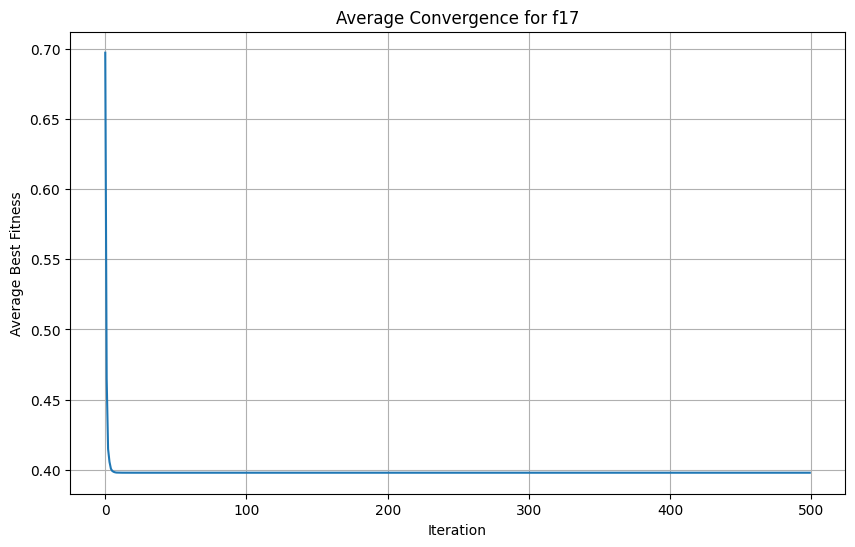


-------------------------
Results for f17:
  AVRG : 3.978874e-01
  STD :  0.000000e+00
  Time Taken:   31.46 seconds
  Convergence graph saved as f17_convergence.png
-------------------------

--- Testing Function: f18 ---


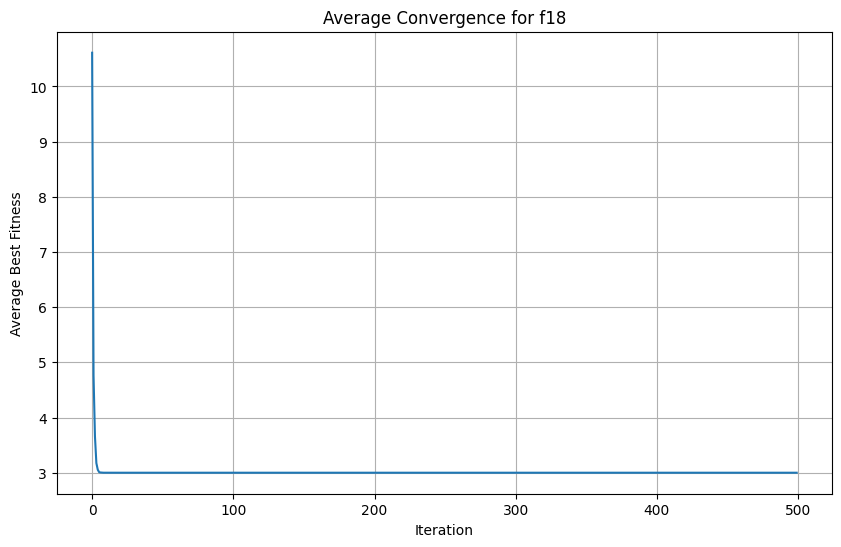


-------------------------
Results for f18:
  AVRG : 3.000000e+00
  STD :  5.617334e-16
  Time Taken:   34.42 seconds
  Convergence graph saved as f18_convergence.png
-------------------------

--- Testing Function: f19 ---


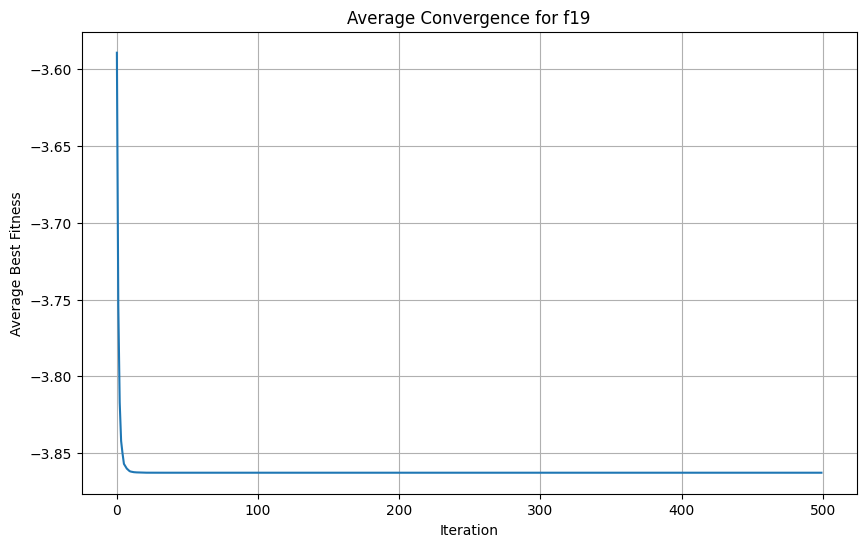


-------------------------
Results for f19:
  AVRG : -3.862780e+00
  STD :  1.332268e-15
  Time Taken:   56.41 seconds
  Convergence graph saved as f19_convergence.png
-------------------------

--- Testing Function: f20 ---


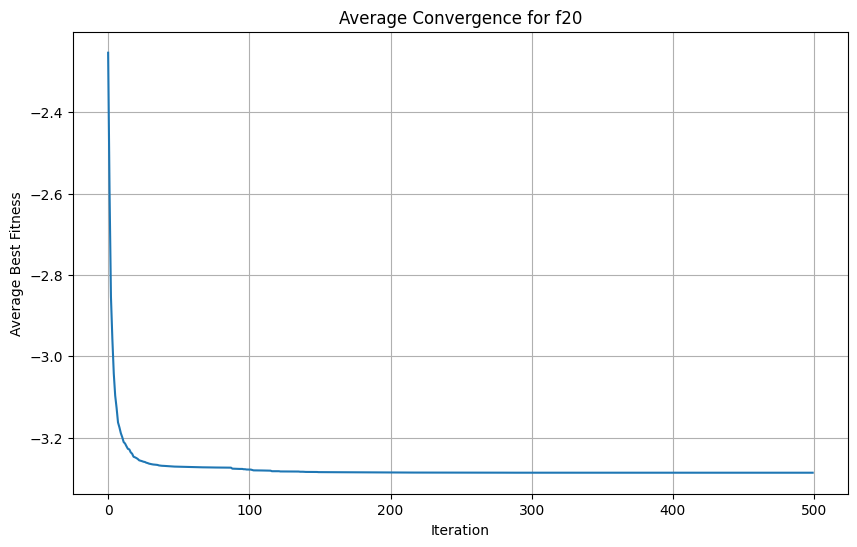


-------------------------
Results for f20:
  AVRG : -3.286605e+00
  STD :  5.462627e-02
  Time Taken:   71.32 seconds
  Convergence graph saved as f20_convergence.png
-------------------------

--- Testing Function: f21 ---


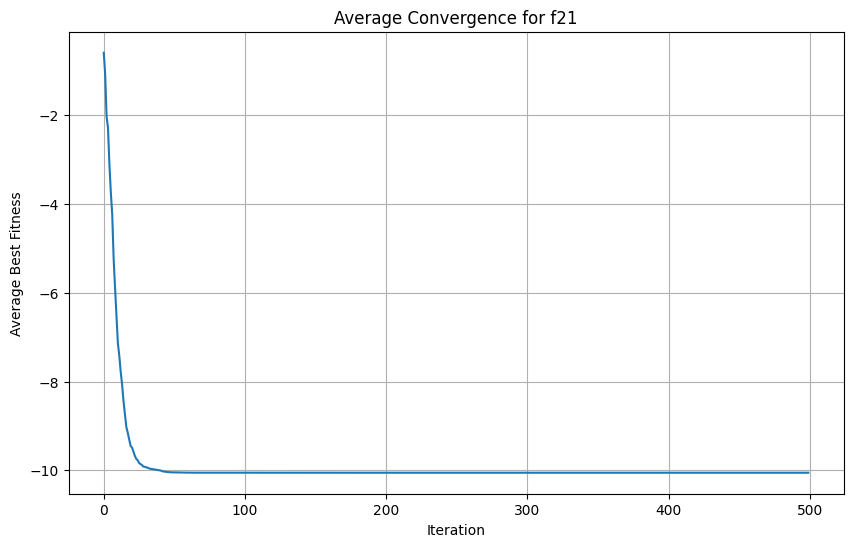


-------------------------
Results for f21:
  AVRG : -1.005353e+01
  STD :  7.944109e-16
  Time Taken:   40.56 seconds
  Convergence graph saved as f21_convergence.png
-------------------------

--- Testing Function: f22 ---


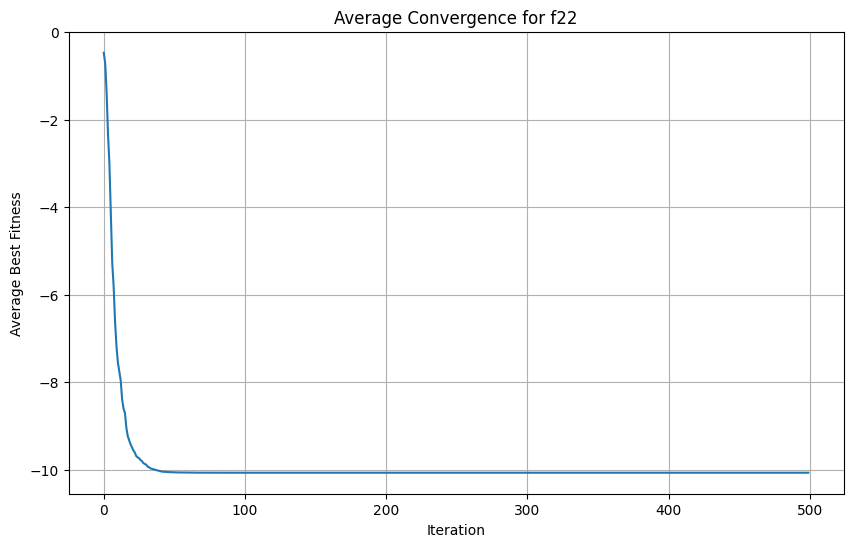


-------------------------
Results for f22:
  AVRG : -1.006371e+01
  STD :  1.521181e-15
  Time Taken:   44.88 seconds
  Convergence graph saved as f22_convergence.png
-------------------------

--- Testing Function: f23 ---


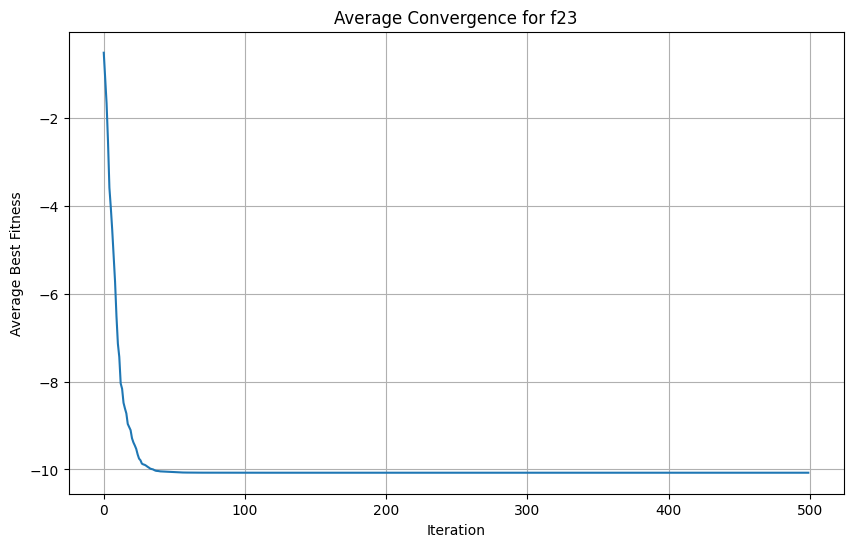


-------------------------
Results for f23:
  AVRG : -1.007505e+01
  STD :  3.726118e-15
  Time Taken:   51.16 seconds
  Convergence graph saved as f23_convergence.png
-------------------------


In [11]:
# --- Driver Code (Fixed for new functions) ---
if __name__ == '__main__':
    benchmarks = [
        {'name': 'f1', 'func': f1, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f2', 'func': f2, 'dim': 30, 'lb': -10, 'ub': 10},
        {'name': 'f3', 'func': f3, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f4', 'func': f4, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f5', 'func': f5, 'dim': 30, 'lb': -5, 'ub': 10},
        {'name': 'f6', 'func': f6, 'dim': 30, 'lb': -100, 'ub': 100},
        {'name': 'f7', 'func': f7, 'dim': 30, 'lb': -1.28, 'ub': 1.28},
        {'name': 'f8', 'func': f8, 'dim': 30, 'lb': -500, 'ub': 500},
        {'name': 'f9', 'func': f9, 'dim': 30, 'lb': -5.12, 'ub': 5.12},
        {'name': 'f10', 'func': f10, 'dim': 30, 'lb': -32, 'ub': 32},
        {'name': 'f11', 'func': f11, 'dim': 30, 'lb': -600, 'ub': 600},
        {'name': 'f12', 'func': f12, 'dim': 30, 'lb': -50, 'ub': 50},
        {'name': 'f13', 'func': f13, 'dim': 30, 'lb': -50, 'ub': 50},
        {'name': 'f14', 'func': f14, 'dim': 2, 'lb': -65, 'ub': 65},
        {'name': 'f15', 'func': f15, 'dim': 4, 'lb': -5, 'ub': 5},
        {'name': 'f16', 'func': f16, 'dim': 2, 'lb': -5, 'ub': 5},
        {'name': 'f17', 'func': f17, 'dim': 2, 'lb': -5, 'ub': 5},
        {'name': 'f18', 'func': f18, 'dim': 2, 'lb': -2, 'ub': 2},
        {'name': 'f19', 'func': f19, 'dim': 3, 'lb': 0, 'ub': 1},
        {'name': 'f20', 'func': f20, 'dim': 6, 'lb': 0, 'ub': 1},
        {'name': 'f21', 'func': f21, 'dim': 4, 'lb': 0, 'ub': 10},
        {'name': 'f22', 'func': f22, 'dim': 4, 'lb': 0, 'ub': 10},
        {'name': 'f23', 'func': f23, 'dim': 4, 'lb': 0, 'ub': 10},
    ]

    population_size = 30
    max_iterations = 500
    num_runs = 30

    print("="*60)
    print("Running Implementation of WaOA with new benchmark functions")
    print(f"Parameters: Pop Size={population_size}, Max Iterations={max_iterations}, Runs={num_runs}")
    print("="*60)

    for bench in benchmarks:
        name, func_handle, dim, lb, ub = bench.values()
        print(f"\n--- Testing Function: {name} ---")

        # FIX: Create a wrapper to match the expected function signature func(x)
        objective_function = lambda x: func_handle(x, dim)

        results = []
        all_curves = []
        start_time = time.time()

        for run in range(num_runs):
            best_fitness, convergence_curve = WaOA(
                func=objective_function,
                dim=dim,
                N=population_size,
                T=max_iterations,
                lb=lb,
                ub=ub
            )
            results.append(best_fitness)
            all_curves.append(convergence_curve)
            print(f"  Run {run+1}/{num_runs}, Best Fitness: {best_fitness:.6e}", end='\r')

        end_time = time.time()
        avrg_fitness, std_fitness = np.mean(results), np.std(results)
        avg_curve = np.mean(all_curves, axis=0)

        plt.figure(figsize=(10, 6))
        plt.plot(avg_curve)
        plt.title(f"Average Convergence for {name}")
        plt.xlabel("Iteration")
        plt.ylabel("Average Best Fitness")
        plt.grid(True)
        plt.show()
        plt.savefig(f"{name}_convergence.png")
        plt.close()

        print("\n" + "-"*25)
        print(f"Results for {name}:")
        print(f"  AVRG : {avrg_fitness:.6e}")
        print(f"  STD :  {std_fitness:.6e}")
        print(f"  Time Taken:   {end_time - start_time:.2f} seconds")
        print(f"  Convergence graph saved as {name}_convergence.png")
        print("-"*25)